In [1]:
from datetime import datetime
import pandas as pd 
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statsmodels.api as sm
from scipy.optimize import minimize
import scipy.stats
from scipy import stats
from sklearn.metrics import confusion_matrix
import warnings
warnings.simplefilter('ignore')

In [4]:

#################################
#### Hierarchical Clustering ####
#################################

# Hierarchical Clustering
BlackBerry_Pearl_Preferences=pd.read_csv("BlackBerry Pearl Preferences.csv", sep=";")
rawdata=BlackBerry_Pearl_Preferences
preferences=rawdata.iloc[:,1:len(rawdata.columns)]


In [5]:
preferences

,RIM BlackBerry Pearl,Palm Treo 700p,Motorola Q,Nokia 9300,Sidekick3,Sony Ericsson M600i
0,9,9,8,7,1,4
1,5,6,4,8,4,4
2,8,7,9,5,3,5
3,6,5,3,7,4,4
4,6,4,3,8,3,4
5,8,7,5,5,7,5
6,9,7,8,6,4,6
7,8,5,9,6,4,5
8,5,5,5,7,5,3
9,5,6,2,8,3,3


In [6]:
preferences.shape

(100, 6)

In [3]:
from sklearn.metrics.pairwise import euclidean_distances
X=euclidean_distances(preferences,preferences)
X

array([[ 0.        ,  7.14142843,  3.87298335, ...,  8.66025404,
        11.09053651,  9.69535971],
       [ 7.14142843,  0.        ,  6.78232998, ...,  4.69041576,
         6.63324958,  5.        ],
       [ 3.87298335,  6.78232998,  0.        , ...,  6.        ,
         8.60232527,  7.54983444],
       ...,
       [ 8.66025404,  4.69041576,  6.        , ...,  0.        ,
         3.74165739,  3.        ],
       [11.09053651,  6.63324958,  8.60232527, ...,  3.74165739,
         0.        ,  4.79583152],
       [ 9.69535971,  5.        ,  7.54983444, ...,  3.        ,
         4.79583152,  0.        ]])

In [7]:
X.shape

(100, 100)

In [12]:
X[0,1]

7.1414284285428495

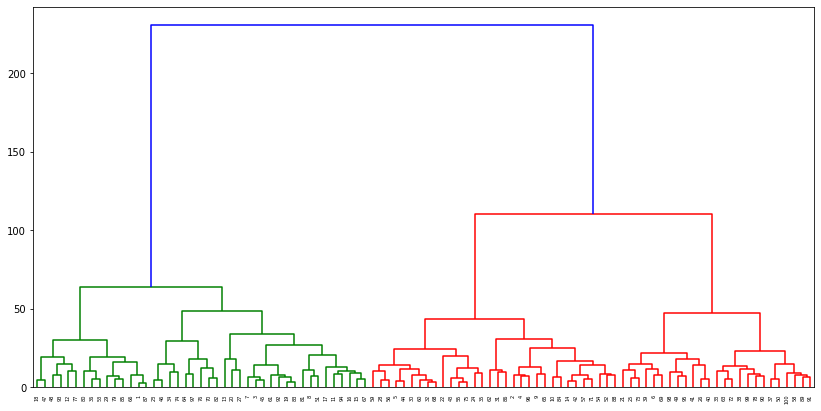

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

from scipy import cluster
Z = cluster.hierarchy.ward(X)

labelList = range(1, len(X)+1)

plt.figure(figsize=(14, 7))
dendrogram(Z,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [16]:
preferences

,RIM BlackBerry Pearl,Palm Treo 700p,Motorola Q,Nokia 9300,Sidekick3,Sony Ericsson M600i,groups
0,9,9,8,7,1,4,1
1,5,6,4,8,4,4,2
2,8,7,9,5,3,5,3
3,6,5,3,7,4,4,2
4,6,4,3,8,3,4,2
5,8,7,5,5,7,5,4
6,9,7,8,6,4,6,3
7,8,5,9,6,4,5,3
8,5,5,5,7,5,3,2
9,5,6,2,8,3,3,2


In [18]:
preferences.groups.value_counts()

2    32
3    28
4    25
1    15
Name: groups, dtype: int64

In [14]:
cutree = cluster.hierarchy.cut_tree(Z, n_clusters=4)
ser=[]
for i in range(len(cutree)):
    ser.append(cutree[i][0]+1)
preferences['groups']=ser
preferencesgrouped =preferences.groupby('groups').agg(['mean'])
preferencesgrouped.columns = ["_".join(x) for x in preferencesgrouped.columns.ravel()]
preferencesgrouped=preferencesgrouped.iloc[:,0:7].reset_index()
preferencesgrouped=preferencesgrouped.iloc[:,0:7]
preferencesgrouped

,groups,RIM BlackBerry Pearl_mean,Palm Treo 700p_mean,Motorola Q_mean,Nokia 9300_mean,Sidekick3_mean,Sony Ericsson M600i_mean
0,1,8.800000,8.666667,8.133333,6.400000,2.466667,4.133333
1,2,5.468750,4.406250,3.062500,7.187500,3.468750,3.625000
2,3,8.214286,6.107143,7.607143,6.107143,3.142857,5.964286
3,4,5.600000,4.320000,4.680000,4.360000,7.040000,4.360000


In [69]:
test=preferences[preferences['groups']==4]
print(np.mean(test.iloc[:,0]))
print(np.mean(test.iloc[:,1]))
print(np.mean(test.iloc[:,2]))
print(np.mean(test.iloc[:,3]))
print(np.mean(test.iloc[:,4]))
print(np.mean(test.iloc[:,5]))

5.6
4.32
4.68
4.36
7.04
4.36


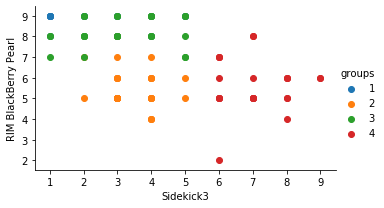

In [17]:
preftemp=preferences
cutree = cluster.hierarchy.cut_tree(Z, n_clusters=4)
ser=[]
for i in range(len(cutree)):
    ser.append(cutree[i][0]+1)
preferences['groups']=ser

import seaborn
from  matplotlib import pyplot

fg = seaborn.FacetGrid(data=preferences, hue='groups', aspect=1.61)
fg.map(pyplot.scatter, 'Sidekick3', 'RIM BlackBerry Pearl').add_legend()

